In [49]:
#Setting up and data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load csv file to pandas dataframe
emission_df = pd.read_csv('CO2_Emissions_Sample.csv')

#Get information regarding the dataframe
emission_df.head()
emission_df.info()
emission_df.describe(include='all')

#Check where missing values are and remove them
print(emission_df.isna().sum())
rows_na = emission_df[emission_df.isna().any(axis=1)]
rows_na
emission_df = emission_df.dropna(how='any')
print(emission_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1000 non-null   object 
 1   Continent          1000 non-null   object 
 2   Year               1000 non-null   int64  
 3   CO2_Emissions      980 non-null    float64
 4   Methane_Emissions  980 non-null    float64
 5   Nitrous_Emissions  1000 non-null   float64
 6   GDP                980 non-null    float64
 7   Population         1000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 62.6+ KB
Country               0
Continent             0
Year                  0
CO2_Emissions        20
Methane_Emissions    20
Nitrous_Emissions     0
GDP                  20
Population            0
dtype: int64
Country              0
Continent            0
Year                 0
CO2_Emissions        0
Methane_Emissions    0
Nitrous_Emissions    0
GDP      

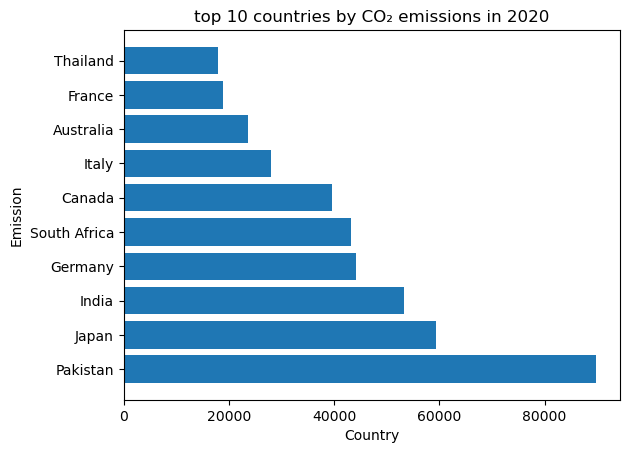

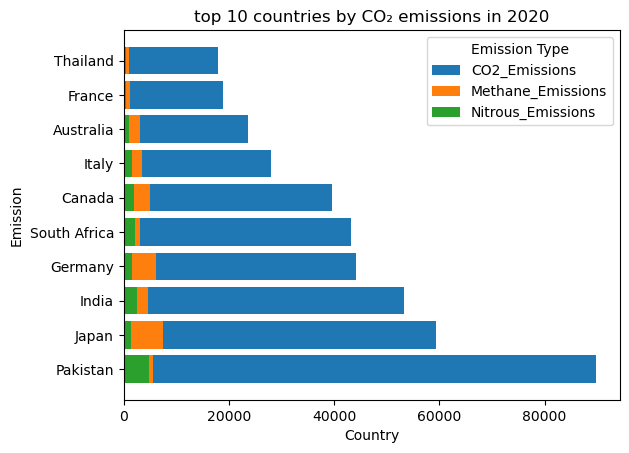

In [50]:
#PART A: Visualizing Amounts
#Bar chart showing the top 10 countries by CO₂ emissions in 2020.

top10_emi2020 = emission_df[emission_df['Year'] == 2020].nlargest(10, 'CO2_Emissions')
top10_emi2020

plt.barh(top10_emi2020['Country'],top10_emi2020['CO2_Emissions'])
plt.xlabel("Country")
plt.ylabel('Emission')
plt.title('top 10 countries by CO₂ emissions in 2020')
plt.show()

#Stacked bar chart showing CO₂, Methane, and Nitrous emissions for the same countries.

plt.barh(top10_emi2020['Country'],top10_emi2020['CO2_Emissions'])
plt.barh(top10_emi2020['Country'], top10_emi2020['Methane_Emissions'])
plt.barh(top10_emi2020['Country'], top10_emi2020['Nitrous_Emissions'])
plt.xlabel("Country")
plt.ylabel('Emission')
plt.legend(title='Emission Type', labels=['CO2_Emissions', 'Methane_Emissions', 'Nitrous_Emissions'])
plt.title('top 10 countries by CO₂ emissions in 2020')

plt.show()


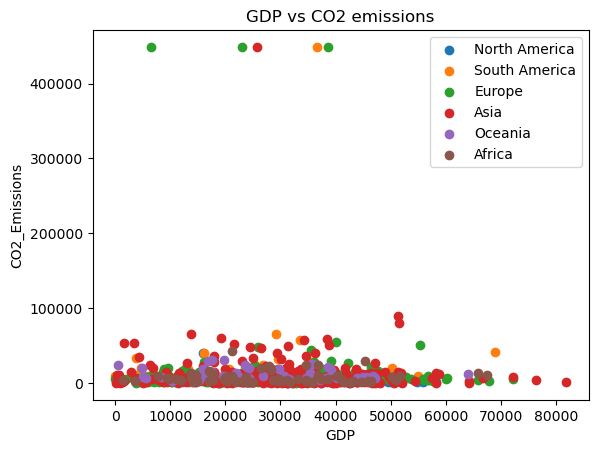

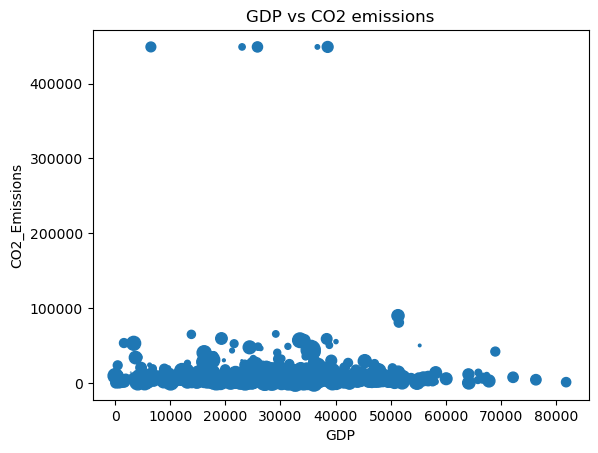

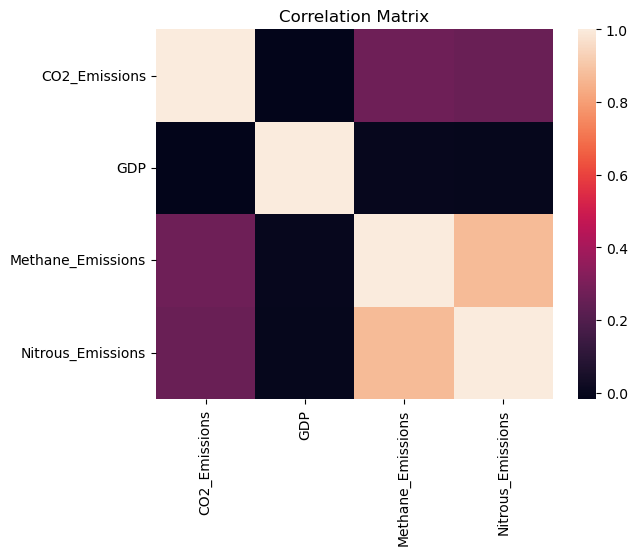

In [ ]:
#PART B: Visualizing Associations
#Scatter plot: GDP vs CO₂ emissions (color = Continent)

for continent in emission_df['Continent'].unique():
    data = emission_df[emission_df['Continent'] == continent]
    plt.scatter(data['GDP'], 
                data['CO2_Emissions'],
                label=continent)

plt.title("GDP vs CO2 emissions")
plt.xlabel("GDP")
plt.ylabel("CO2_Emissions")
plt.legend()
plt.show()


#Bubble chart: GDP vs CO₂, bubble size = Population
plt.scatter(
    emission_df['GDP'],
    emission_df['CO2_Emissions'],
    s = emission_df['Population']/1000000
)
plt.title("GDP vs CO2 emissions")
plt.xlabel("GDP")
plt.ylabel("CO2_Emissions")
plt.show()



#Correlogram: correlation matrix for CO₂, GDP, Methane, Nitrous.
corr_data = emission_df[['CO2_Emissions', 'GDP', 'Methane_Emissions', 'Nitrous_Emissions']]
sns.heatmap(corr_data.corr())
plt.title('correlation matrix')
plt.show()

#Comment on any visible patterns or relationships
#CO2, Methane and Nitrous have a strong positive relationship; GDP and emission  have little relationship.

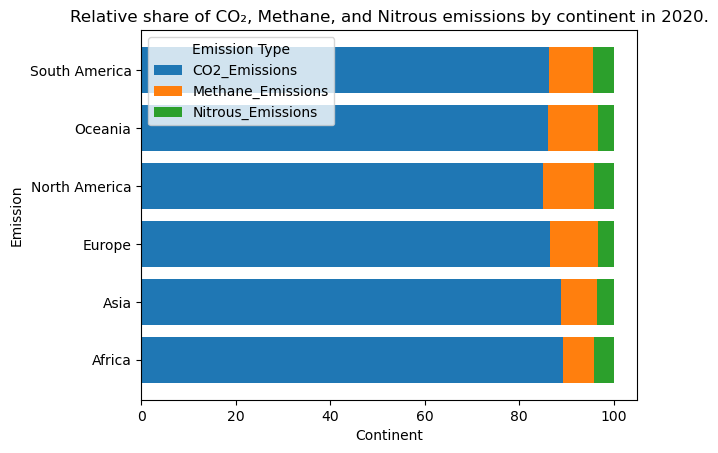

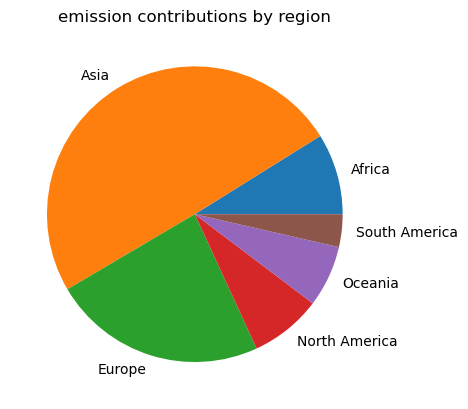

In [ ]:
#PART C: Visualizing Proportions
#Stacked bar chart: show the relative share of CO₂, Methane, and Nitrous emissions by continent in 2020.
con_emi2020 = emission_df[emission_df['Year'] == 2020].groupby('Continent')[['CO2_Emissions', 'Methane_Emissions', 'Nitrous_Emissions']].sum()

con_emi2020

con_emi2020['Total'] = con_emi2020.sum(axis=1)
con_emi2020['CO2'] =  (con_emi2020['CO2_Emissions'] / con_emi2020['Total']) * 100
con_emi2020['Methane'] = (con_emi2020['Methane_Emissions'] / con_emi2020['Total']) * 100
con_emi2020['Nitrous'] = (con_emi2020['Nitrous_Emissions'] / con_emi2020['Total']) * 100

plt.barh(con_emi2020.index, con_emi2020['CO2'], label='CO2')
plt.barh(con_emi2020.index, con_emi2020['Methane'], left=con_emi2020['CO2'], label='Methane')
plt.barh(con_emi2020.index, con_emi2020['Nitrous'], left=con_emi2020['CO2']+con_emi2020['Methane'], label='Nitrous')

plt.xlabel("Continent")
plt.ylabel('Emission')
plt.legend(title='Emission Type', labels=['CO2_Emissions', 'Methane_Emissions', 'Nitrous_Emissions'])
plt.title('Relative share of CO₂, Methane, and Nitrous emissions by continent in 2020.')
plt.show()



#Treemap or pie chart: illustrate emission contributions by region
plt.pie(con_emi2020['Total'], labels=con_emi2020.index)
plt.title('Emission contributions by region')
plt.show()


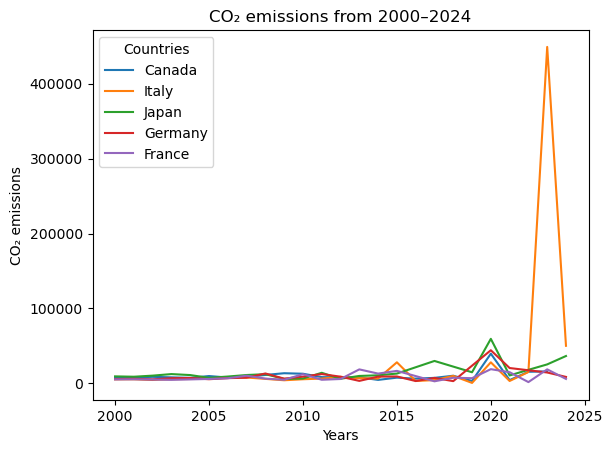

In [ ]:
#PART D: Visualizing Time Series
#Line chart: CO₂ emissions from 2000–2024 for 5 selected countries, Add a 5-year moving average to smooth the trend.
countries = ['Canada','Italy', 'Japan' , 'Germany', 'France']

cijgf = emission_df[(emission_df['Country'].isin(countries)) & (emission_df['Year'] >= 2000) & (emission_df['Year'] <= 2024)]

cijgf 

for country in countries:
    data = cijgf[cijgf['Country'] == country].sort_values('Year')
    plt.plot(data['Year'], data['CO2_Emissions'])


plt.title('CO₂ emissions from 2000–2024')
plt.xlabel('Years')
plt.ylabel('CO₂ emissions')
plt.legend(title='Countries', labels=['Canada','Italy', 'Japan' , 'Germany', 'France'])
plt.show()



#Discuss general trends (increase, decrease, stability)
#Spikes and increased emission around 2020, As emission comes to closer to the current year many countries are lowering their emission with an except for Japan.

In [ ]:
#PART E: PCA Representation

#1) Data aggregation (Year = 2020)
emi_2020 = emission_df[emission_df['Year'] == 2020]

#2) PCA feature extraction

#3)

#4)



In [62]:
emission_df.to_csv('CO2_Emissions_Sample_Cleaned.csv', index=False)